# UNO 

### Import
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns

sns.set()

In [2]:
def bold(string):
    chr_start = "\033[1m"
    chr_end = "\033[0m"
    print (chr_start + string + chr_end)
    
def underline(string):
    chr_start = "\033[4m"
    chr_end = "\033[0m"
    print(chr_start + string + chr_end)

In [3]:
# Generate a dictionary mapping each fund to a specific color from a color spectrum, ensuring consistent coloring in visualizations.
def color_lib(categories):

    c_scale = cm.rainbow(np.linspace(0,1,len(categories)))
    c_dict = {}

    for i,c in zip(categories,c_scale):
        c_dict[i] = c
        
    return c_dict

### Analysis
***

In [4]:
df_QL = pd.read_csv('../Results/QL_results.csv')
df_QL.head()

,winner,turns,win_rate
0,Human,64,0.000000
1,AI,26,0.500000
2,Human,14,0.333333
3,Human,19,0.250000
4,AI,67,0.400000


In [5]:
df = pd.read_csv('../Results/results.csv')
df.head()

,winner,turns,win_rate
0,Human,38,0.0
1,Human,19,0.0
2,Human,34,0.0
3,Human,21,0.0
4,Human,16,0.0


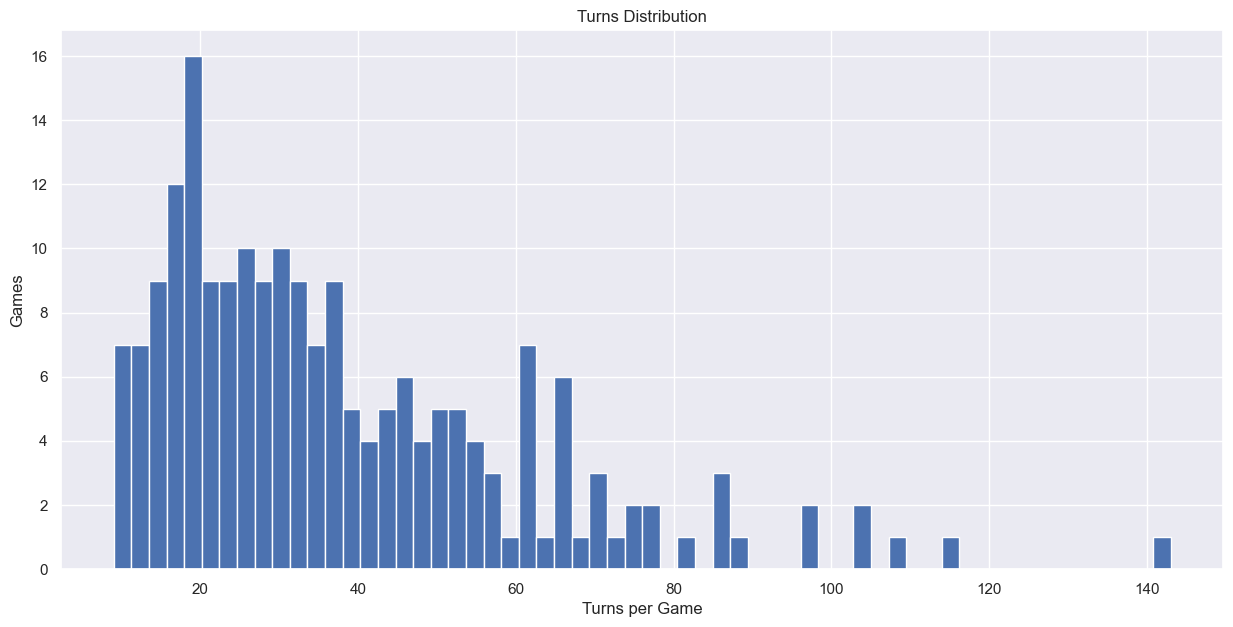

In [6]:
fig = plt.figure(1, figsize=(15,7))

plt.hist(df["turns"], bins =60, edgecolor = "w")
plt.title("Turns Distribution")
plt.xlabel("Turns per Game")
plt.ylabel("Games")

plt.show()

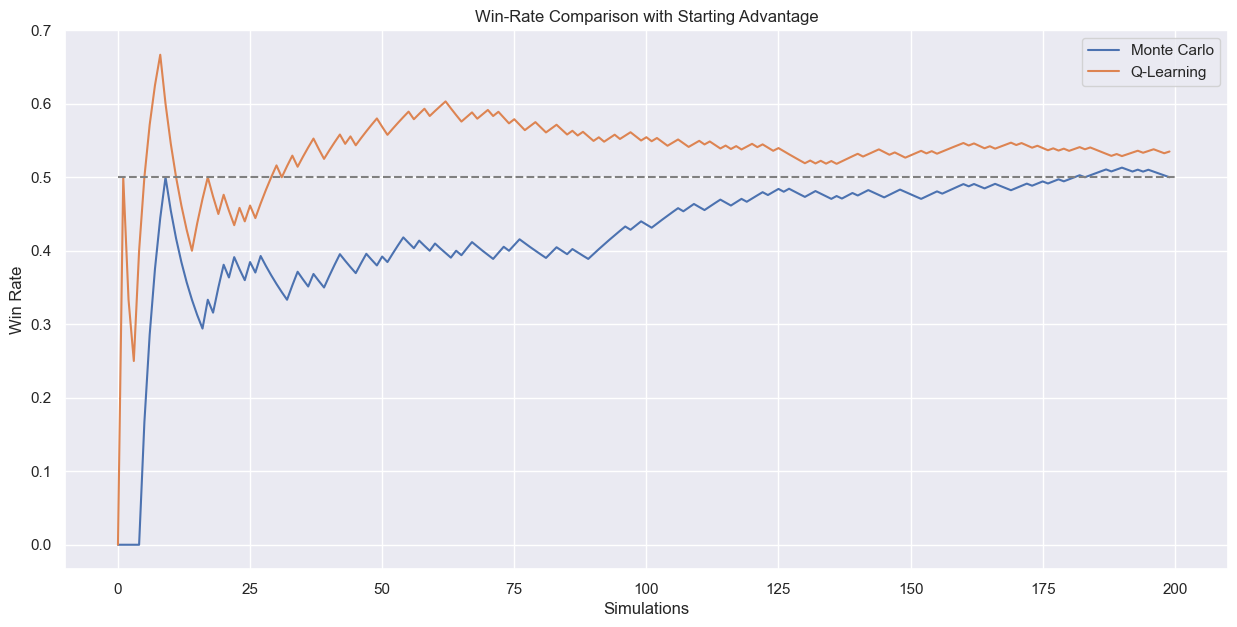

In [7]:
import matplotlib.pyplot as plt

# Assuming df and df_QL are already defined dataframes

fig = plt.figure(1, figsize=(15,7))

# Plot win rates for Monte Carlo model
plt.plot(df.index, df["win_rate"], label='Monte Carlo')

# Plot win rates for Q-Learning model
plt.plot(df_QL.index, df_QL["win_rate"], label='Q-Learning')

# Add a horizontal line at 0.5 for reference
plt.hlines(0.5, 0, max(len(df), len(df_QL)), colors="grey", linestyles="dashed")

plt.title("Win-Rate Comparison with Starting Advantage")
plt.xlabel("Simulations")
plt.ylabel("Win Rate")
plt.legend()  # Display legend to distinguish between the models
plt.show()


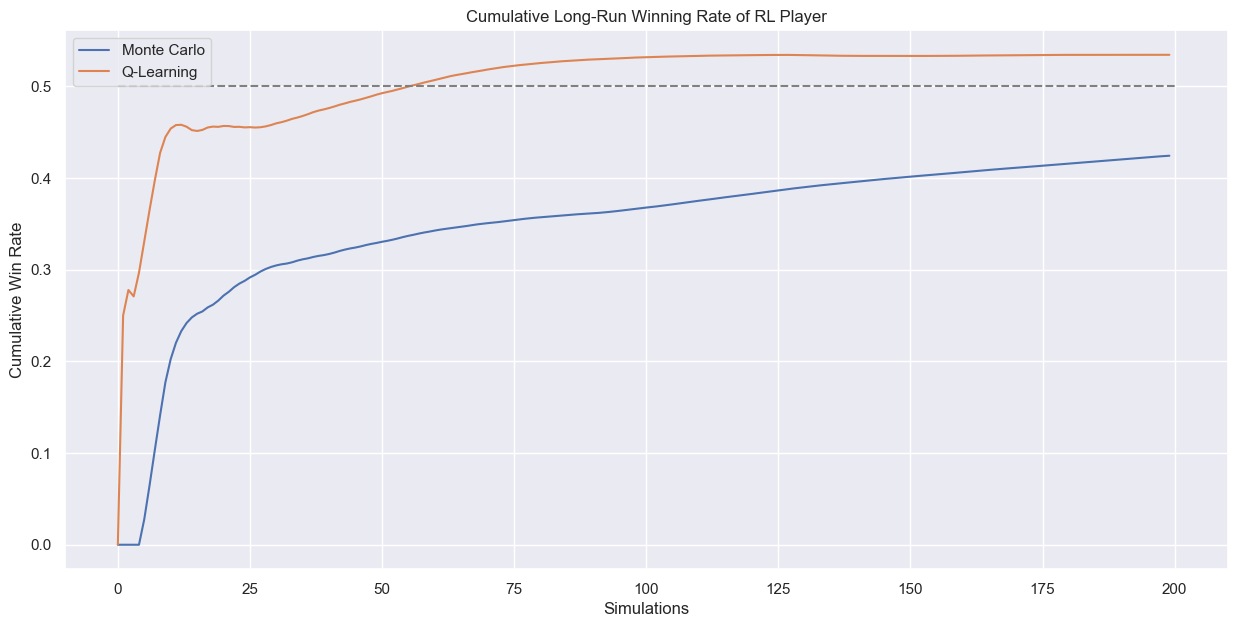

In [8]:
import matplotlib.pyplot as plt

# Assuming df and df_QL are already defined dataframes

fig = plt.figure(1, figsize=(15,7))

# Calculate cumulative winning rates for Monte Carlo and Q-Learning models
df["cumulative_win_rate"] = df["win_rate"].cumsum() / (df.index + 1)
df_QL["cumulative_win_rate"] = df_QL["win_rate"].cumsum() / (df_QL.index + 1)

# Plot cumulative winning rates for both models
plt.plot(df.index, df["cumulative_win_rate"], label='Monte Carlo')
plt.plot(df_QL.index, df_QL["cumulative_win_rate"], label='Q-Learning')

# Add a horizontal line at 0.5 for reference
plt.hlines(0.5, 0, max(len(df), len(df_QL)), colors="grey", linestyles="dashed")

plt.title("Cumulative Long-Run Winning Rate of RL Player")
plt.xlabel("Simulations")
plt.ylabel("Cumulative Win Rate")
plt.legend()  # Display legend to distinguish between the models
plt.show()


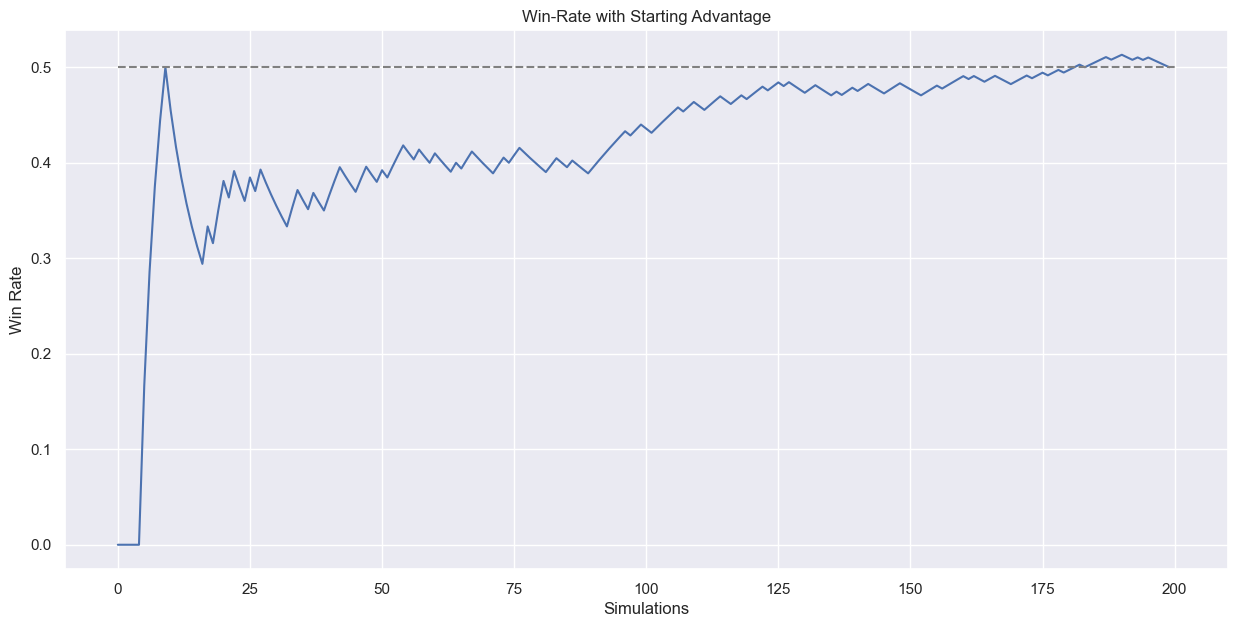

In [9]:
fig = plt.figure(1, figsize=(15,7))

plt.plot(df.index, df["win_rate"])
plt.hlines(0.5, 0, len(df), colors="grey", linestyles="dashed")

plt.title("Win-Rate with Starting Advantage")
plt.xlabel("Simulations")
plt.ylabel("Win Rate")
plt.show()

#### Q-Values

In [10]:
q_values = pd.read_csv('../Results/q-values.csv',index_col='id')

actions = q_values.columns

q_values['MAX'] = q_values.max(axis=1)
q_values['ID'] = q_values.index
q_values['HAND'] = q_values['ID'].apply(lambda x: sum(eval(x)[1:]))

q_values.drop(columns='ID', inplace=True)
q_values.head(3)

,RED,GRE,BLU,YEL,SKI,REV,PL2,PL4,COL,MAX,HAND
id,,,,,,,,,,,
"('RED', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
"('RED', 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
"('RED', 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


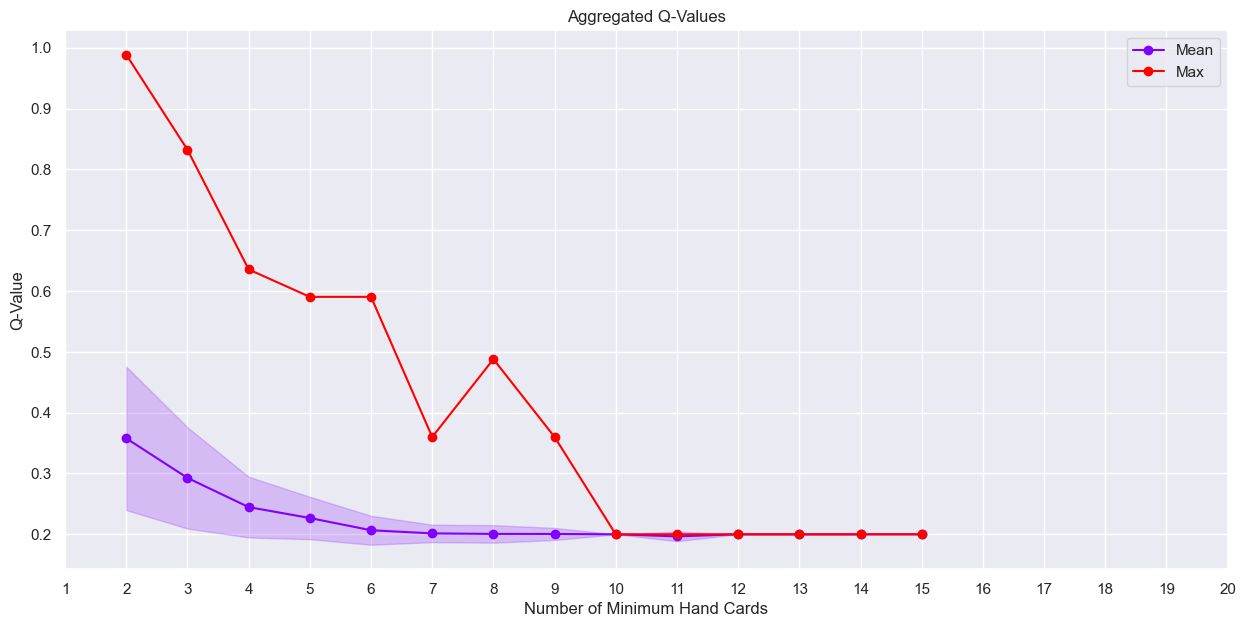

In [11]:
q_curve = q_values.copy()
q_curve[["HAND","MAX"]] = q_curve[["HAND","MAX"]].replace(0, np.NaN)

q_mean = pd.Series(q_curve.groupby("HAND").mean()["MAX"])
q_max  = pd.Series(q_curve.groupby("HAND").max()["MAX"])
q_std  = pd.Series(q_curve.groupby("HAND").std()["MAX"])/2

fig = plt.figure(1, figsize=(15,7))
colors = color_lib(["Mean","Max"])

plt.plot(q_mean.index, q_mean, label="Mean", marker = "o", c = colors["Mean"])
plt.plot(q_max.index,  q_max,  label="Max",  marker = "o", c = colors["Max"])
plt.fill_between(q_mean.index, q_mean-q_std, q_mean+q_std, color = colors["Mean"], alpha=0.2)

plt.xticks(q_mean.index)
plt.xlabel("Number of Minimum Hand Cards")
plt.ylabel("Q-Value")
plt.title("Aggregated Q-Values")
plt.legend()
plt.show()

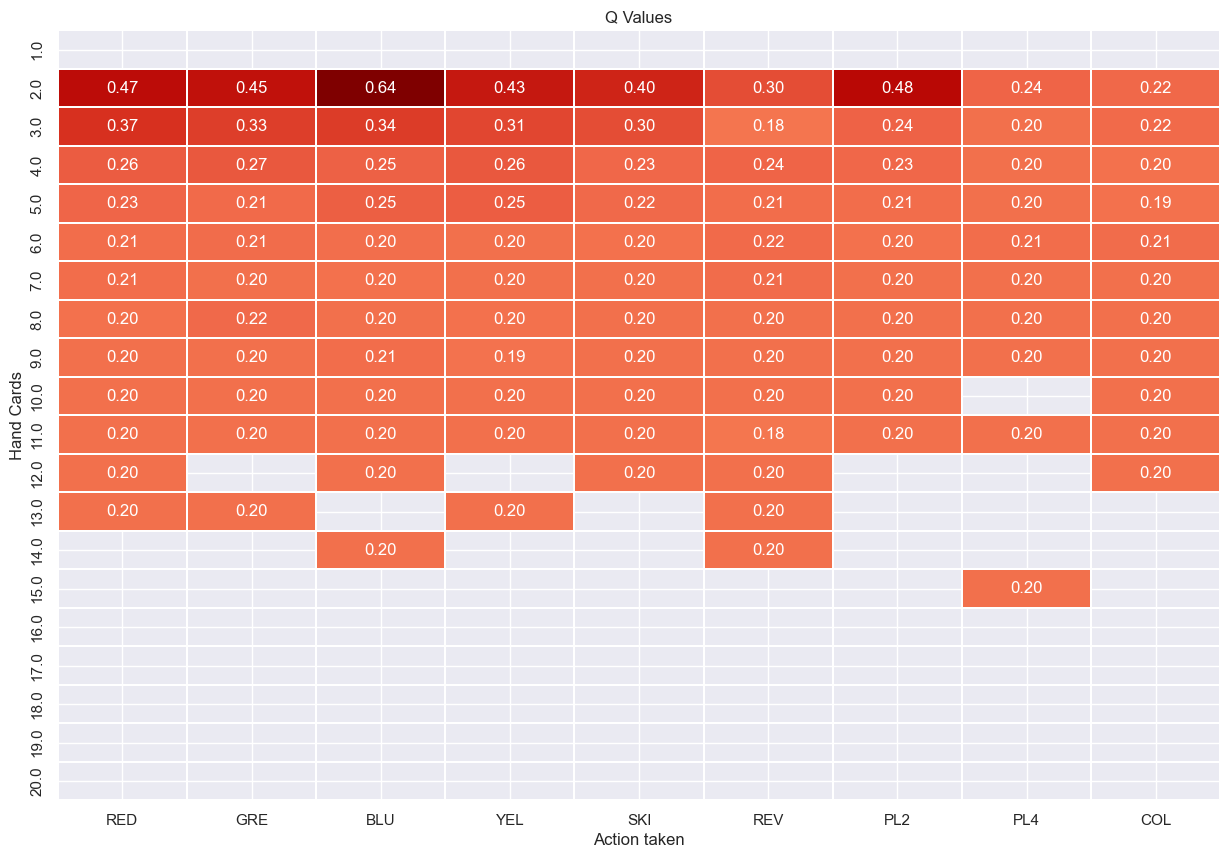

In [12]:
q_pivot = q_values.replace(0, np.NaN)
q_pivot = q_pivot.drop(columns='MAX').groupby("HAND").mean()

# Plotting
fig, ax = plt.subplots(1, 1, figsize = (15,10))

sns.heatmap(q_pivot, 
            fmt=".2f", 
            cmap = "OrRd", 
            linewidth = 0.3, 
            annot = True,
            cbar = False,
            center = 0.1)

ax.title.set_text("Q Values")
ax.set(xlabel="Action taken", ylabel="Hand Cards")
plt.show()